It will disallow trades when higher volatility regimes are predicted. The hope is that by doing so it will eliminate unprofitable trades and possibly remove volatility from the strategy, thus increasing its Sharpe ratio.

### Strategy:

The short-term trend following strategy is of the classic moving average crossover type. The rules are simple:

At every bar calculate the 10-day and 30-day simple moving averages (SMA)
If the 10-day SMA exceeds the 30-day SMA and the strategy is not invested, then go long
If the 30-day SMA exceeds the 10-day SMA and the strategy is invested, then close the position

In [104]:
# regime_hmm_train.py

from __future__ import print_function

import datetime
import pickle
import warnings

from hmmlearn.hmm import GaussianHMM
from matplotlib import cm, pyplot as plt
from matplotlib.dates import YearLocator, MonthLocator
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf

In [105]:
df = yf.download('^NSEI', start='2014-01-01', end='2021-01-01')

[*********************100%***********************]  1 of 1 completed


In [106]:
df.columns = df.columns.droplevel(1)


In [107]:
def plot_in_sample_hidden_states(hmm_model, df):
    """
    Plot the adjusted closing prices masked by 
    the in-sample hidden states as a mechanism
    to understand the market regimes.
    """
    # Predict the hidden states array
    hidden_states = hmm_model.predict(rets)
    # Create the correctly formatted plot
    fig, axs = plt.subplots(
        hmm_model.n_components, 
        sharex=True, sharey=True
    )
    colours = cm.rainbow(
        np.linspace(0, 1, hmm_model.n_components)
    )
    for i, (ax, colour) in enumerate(zip(axs, colours)):
        mask = hidden_states == i
        ax.plot_date(
            df.index[mask], 
            df["Adj Close"][mask], 
            ".", linestyle='none', 
            c=colour
        )
        ax.set_title("Hidden State #%s" % i)
        ax.xaxis.set_major_locator(YearLocator())
        ax.xaxis.set_minor_locator(MonthLocator())
        ax.grid(True)
    plt.show()

In [108]:
df["Returns"] = df["Adj Close"].pct_change()
df = df.dropna()
rets = np.column_stack([df["Returns"]])

hmm_model = GaussianHMM(n_components=3, covariance_type="full", n_iter=1000).fit(rets)
print("Model Score:", hmm_model.score(rets))

Model Score: 5630.473630663681


C:\Users\Arin Zingade\AppData\Local\Temp\ipykernel_26640\4111371509.py:19: MatplotlibDeprecationWarning: The plot_date function was deprecated in Matplotlib 3.9 and will be removed in 3.11. Use plot instead.
  ax.plot_date(


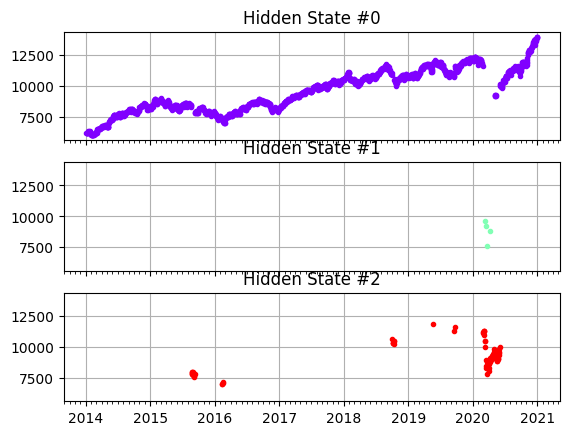

In [109]:
plot_in_sample_hidden_states(hmm_model, df)